In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as stats
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['figure.figsize'] = (8, 6)
%config InlineBackend.figure_format = 'retina'

In [2]:
path_to_results = '/home/ng213/pazy_code/pazy-aepw3-results/05_StraightWingFlutter/'

In [3]:
results = {}

results['sharpy_wo_skin'] = {'path': path_to_results + '/skin_off/',
                            'skin': False}

results['sharpy_w_skin'] = {'path': path_to_results + '/skin_on/',
                            'skin': True}

In [7]:
for case in results.values():
    case['eigs'] = np.loadtxt(case['path'] + '/vel_eigs.txt')
    case['vg'] = np.loadtxt(case['path'] + '/stability_analysis.txt')
    with open(case['path'] + '/flutter.txt', 'r') as f:
        case['flutter_str'] = f.read()

In [8]:
for k, case in results.items():
    print(k)
    print('\t' + case['flutter_str'])

sharpy_wo_skin
	Flutter speed = 63.0035 m/s
sharpy_w_skin
	Flutter speed = 80.0031 m/s


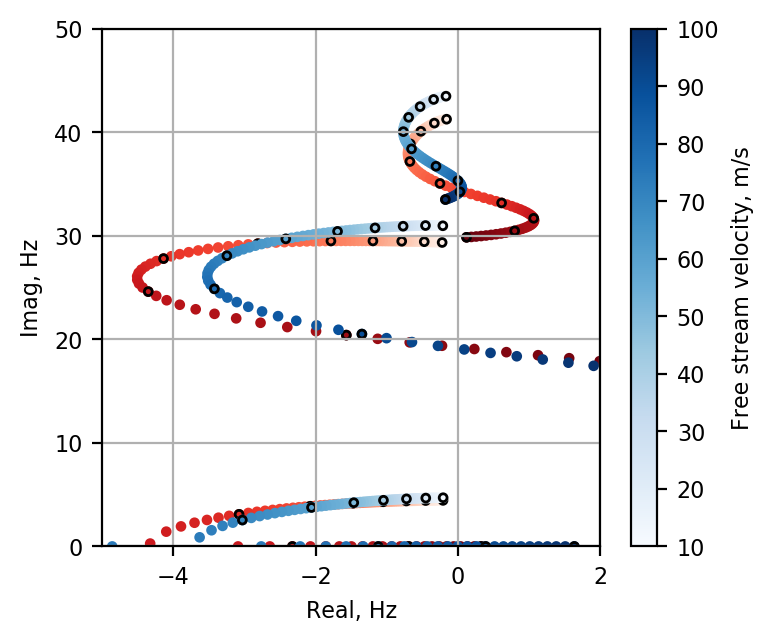

In [55]:
cm2in = 1/2.54
ar = 1.2
width_cm = 10

figsize = (width_cm * cm2in, width_cm / ar * cm2in)
fig, ax = plt.subplots(ncols=1, figsize=figsize)

for case in results.values():
    if case['skin']:
        a = ax
        cmap='Blues'
        lab = 'Skin on'
    else:
        a = ax
        cmap='Reds'
        lab = 'Skin off'
    a.scatter(case['eigs'][:, 1] / 2 /np.pi, case['eigs'][:, 2]/2/np.pi, c=case['eigs'][:, 0], cmap=cmap,
             s=8, label=lab)
    
    for vel in np.linspace(10, 120, 12):
        vel_ind = (case['eigs'][:, 0] == vel)
        a.scatter(case['eigs'][vel_ind, 1] / 2/np.pi, case['eigs'][vel_ind, 2]/2/np.pi, marker='o', color='none', edgecolor='k', s=8)
    
# for a in ax
a.set_xlim(-5, 2)
a.set_ylim(0., 50)
a.grid()
a.set_xlabel('Real, Hz')
a.set_ylabel('Imag, Hz')

sm = mpl.cm.ScalarMappable(norm=plt.Normalize(vmin=10, vmax=100), cmap='Blues')
cb = plt.colorbar(sm, ax=a)
cb.set_label('Free stream velocity, m/s', fontsize=8)
cb.ax.tick_params(labelsize=8)


for item in ([a.title, a.xaxis.label, a.yaxis.label] +
             a.get_xticklabels() + a.get_yticklabels()):
    item.set_fontsize(8)

plt.tight_layout()
plt.savefig('../figures/04_StraightFlutterEigs.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


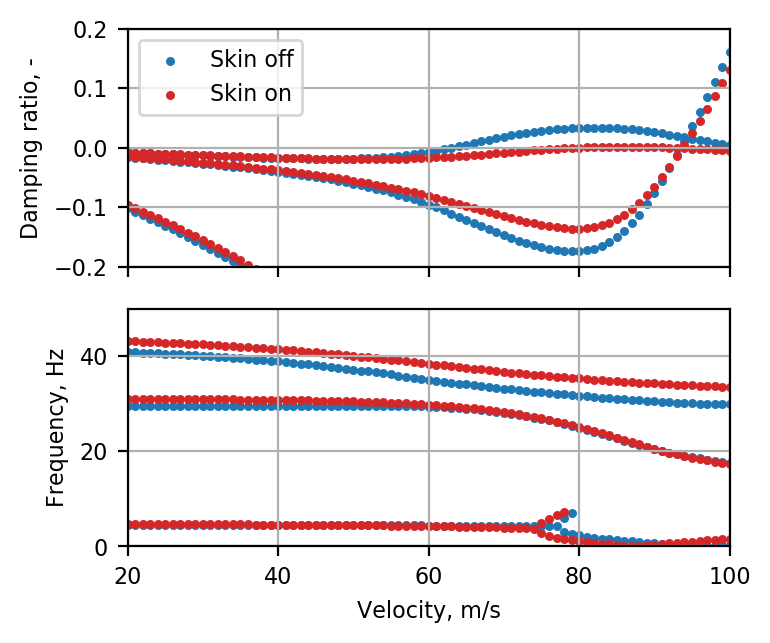

In [56]:
cm2in = 1/2.54
ar = 1.2
width_cm = 10

figsize = (width_cm * cm2in, width_cm / ar * cm2in)
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=figsize)

for case in results.values():
    if case['skin']:
        color='tab:red'
        lab = 'Skin on'
    else:
        color='tab:blue'
        lab = 'Skin off'
    cond = case['vg'][:, 2] < 50
    ax[0].scatter(case['vg'][cond, 0], case['vg'][cond, 1], s=5, color=color, label=lab)
    ax[1].scatter(case['vg'][cond, 0], case['vg'][cond, 2], s=5, color=color)
    
ax[0].set_ylim(-0.2, 0.2)
ax[0].grid()
ax[1].set_ylim(0, 50)
ax[1].grid()
ax[1].set_xlabel('Velocity, m/s')
ax[1].set_ylabel('Frequency, Hz')
ax[0].set_ylabel('Damping ratio, -')
ax[1].set_xlim(20, 100)
ax[0].legend(fontsize=8)


for a in ax:
    for item in ([a.title, a.xaxis.label, a.yaxis.label] +
             a.get_xticklabels() + a.get_yticklabels()):
        item.set_fontsize(8)

plt.tight_layout()
plt.savefig('../figures/04_StraightFlutterVg.eps')